In [2]:
import pywt
import re
import numpy as np
import matplotlib.pyplot as plt
import math
import  os
from scipy.io import loadmat
import scipy.io as sio
import time
from numpy import loadtxt
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [3]:
    data_path = r'data\centrifugal pump'##原始数据地址
    save_path=r'nonoise_data'

In [4]:
#小波变换法
def wavelet_means(or_data):
    index = []
    data = []
    
    
    for i in range(len(or_data)-1 ):
        X = float(i)
        Y = float(or_data[i])
        index.append(X)
        data.append(Y)

    #Create wavelet object and define parameters
    w = pywt.Wavelet('db8')  # 选用Daubechies8小波
    maxlev = (len(data), w.dec_len)#Compute the maximum useful level of decomposition
    print("maximum level is " + str(maxlev))
    threshold = 0.04  # Threshold for filtering

    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(data, 'db8', level=16)  # 将信号进行小波分解

    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold * max(coeffs[i]))  # 将噪声滤波

    datarec = pywt.waverec(coeffs, 'db8')  # 将信号进行小波重构
    return datarec

# 单个数据

maximum level is (2014, 16)
Running time: 0.006888628005981445 Seconds


D:\anoconda\envs\pytorch\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 16 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


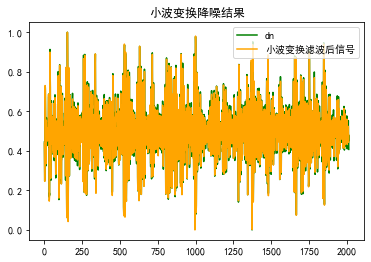

In [36]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
    
path1=os.path.join(data_path,r'bearing_failure',r'data_000001.txt')
data1=loadtxt(path1)
scaler = MinMaxScaler()
data2=data1.reshape(-1,1)
data2 = scaler.fit_transform(data2)
start=time.time()
nonoise_data= wavelet_means(data1)

nonoise_data = scaler.fit_transform(nonoise_data.reshape(-1,1))
end = time.time()
print('Running time: %s Seconds' % (end - start))

plt.title('小波变换降噪结果')

plt.plot(data2,color='green', label='dn')
plt.plot(nonoise_data, color='orange',label='小波变换滤波后信号')

plt.legend(loc=1) # 显示图例
plt.show()
#rmse1= rmse(data1[0:998],nonoise_data)

# 批量进行，并归一化预处理 

In [37]:
# def data_load(path):
#     # 数据归一化
#     # 归一化data
#     data = loadtxt(path)
#     data= wavelet_means(data)
#     scaler = MinMaxScaler()
#     data_n = scaler.fit_transform(data.reshape(-1,1))
#     data_cut = []
#     data_cut.append(data_n)
#     return data_cut

In [16]:
def data_load(path):
    # 不归一化
    data = loadtxt(path)
    data= wavelet_means(data)
    data_cut = []
    data_cut.append(data)
    return data_cut

In [17]:
label=[]
data_train=[]
file_1=os.listdir(data_path)
d = 0
start=time.time()
for k in file_1:
        d_path=os.path.join(data_path, k)
        filenames = os.listdir(d_path)
        for i in filenames:
            data_set = os.path.join(d_path ,i)
            data1=data_load(data_set)
            print(str(k),d,str(i))
            label.append(d)
            data_train=data_train+data1
            print(str(d_path),str(k),np.asarray(data_train,dtype = 'float').shape)
        d=d+1
end = time.time()

maximum level is (2014, 16)
bearing_failure 0 data_000001.txt
data\centrifugal pump\bearing_failure bearing_failure (1, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000002.txt
data\centrifugal pump\bearing_failure bearing_failure (2, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000003.txt
data\centrifugal pump\bearing_failure bearing_failure (3, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000004.txt
data\centrifugal pump\bearing_failure bearing_failure (4, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000005.txt
data\centrifugal pump\bearing_failure bearing_failure (5, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000006.txt
data\centrifugal pump\bearing_failure bearing_failure (6, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000007.txt
data\centrifugal pump\bearing_failure bearing_failure (7, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000008.txt
data\centrifugal pump\bearing_failure bearing_failure (8

D:\anoconda\envs\pytorch\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 16 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


bearing_failure 0 data_000026.txt
data\centrifugal pump\bearing_failure bearing_failure (26, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000027.txt
data\centrifugal pump\bearing_failure bearing_failure (27, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000028.txt
data\centrifugal pump\bearing_failure bearing_failure (28, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000029.txt
data\centrifugal pump\bearing_failure bearing_failure (29, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000030.txt
data\centrifugal pump\bearing_failure bearing_failure (30, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000031.txt
data\centrifugal pump\bearing_failure bearing_failure (31, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000032.txt
data\centrifugal pump\bearing_failure bearing_failure (32, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000033.txt
data\centrifugal pump\bearing_failure bearing_failure (33, 2014)
maximum leve

bearing_failure 0 data_000100.txt
data\centrifugal pump\bearing_failure bearing_failure (100, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000101.txt
data\centrifugal pump\bearing_failure bearing_failure (101, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000102.txt
data\centrifugal pump\bearing_failure bearing_failure (102, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000103.txt
data\centrifugal pump\bearing_failure bearing_failure (103, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000104.txt
data\centrifugal pump\bearing_failure bearing_failure (104, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000105.txt
data\centrifugal pump\bearing_failure bearing_failure (105, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000106.txt
data\centrifugal pump\bearing_failure bearing_failure (106, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000107.txt
data\centrifugal pump\bearing_failure bearing_failure (107, 2014)
maxi

data\centrifugal pump\bearing_failure bearing_failure (164, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000165.txt
data\centrifugal pump\bearing_failure bearing_failure (165, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000166.txt
data\centrifugal pump\bearing_failure bearing_failure (166, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000167.txt
data\centrifugal pump\bearing_failure bearing_failure (167, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000168.txt
data\centrifugal pump\bearing_failure bearing_failure (168, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000169.txt
data\centrifugal pump\bearing_failure bearing_failure (169, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000170.txt
data\centrifugal pump\bearing_failure bearing_failure (170, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000171.txt
data\centrifugal pump\bearing_failure bearing_failure (171, 2014)
maximum level is (2014, 16)
bearing_fa

bearing_failure 0 data_000244.txt
data\centrifugal pump\bearing_failure bearing_failure (244, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000245.txt
data\centrifugal pump\bearing_failure bearing_failure (245, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000246.txt
data\centrifugal pump\bearing_failure bearing_failure (246, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000247.txt
data\centrifugal pump\bearing_failure bearing_failure (247, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000248.txt
data\centrifugal pump\bearing_failure bearing_failure (248, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000249.txt
data\centrifugal pump\bearing_failure bearing_failure (249, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000250.txt
data\centrifugal pump\bearing_failure bearing_failure (250, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000251.txt
data\centrifugal pump\bearing_failure bearing_failure (251, 2014)
maxi

maximum level is (2014, 16)
bearing_failure 0 data_000322.txt
data\centrifugal pump\bearing_failure bearing_failure (322, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000323.txt
data\centrifugal pump\bearing_failure bearing_failure (323, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000324.txt
data\centrifugal pump\bearing_failure bearing_failure (324, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000325.txt
data\centrifugal pump\bearing_failure bearing_failure (325, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000326.txt
data\centrifugal pump\bearing_failure bearing_failure (326, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000327.txt
data\centrifugal pump\bearing_failure bearing_failure (327, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000328.txt
data\centrifugal pump\bearing_failure bearing_failure (328, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000329.txt
data\centrifugal pump\bearing_failure bear

maximum level is (2014, 16)
bearing_failure 0 data_000397.txt
data\centrifugal pump\bearing_failure bearing_failure (397, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000398.txt
data\centrifugal pump\bearing_failure bearing_failure (398, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000399.txt
data\centrifugal pump\bearing_failure bearing_failure (399, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000400.txt
data\centrifugal pump\bearing_failure bearing_failure (400, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000401.txt
data\centrifugal pump\bearing_failure bearing_failure (401, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000402.txt
data\centrifugal pump\bearing_failure bearing_failure (402, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000403.txt
data\centrifugal pump\bearing_failure bearing_failure (403, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000404.txt
data\centrifugal pump\bearing_failure bear

maximum level is (2014, 16)
bearing_failure 0 data_000470.txt
data\centrifugal pump\bearing_failure bearing_failure (470, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000471.txt
data\centrifugal pump\bearing_failure bearing_failure (471, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000472.txt
data\centrifugal pump\bearing_failure bearing_failure (472, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000473.txt
data\centrifugal pump\bearing_failure bearing_failure (473, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000474.txt
data\centrifugal pump\bearing_failure bearing_failure (474, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000475.txt
data\centrifugal pump\bearing_failure bearing_failure (475, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000476.txt
data\centrifugal pump\bearing_failure bearing_failure (476, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000477.txt
data\centrifugal pump\bearing_failure bear

bearing_failure 0 data_000550.txt
data\centrifugal pump\bearing_failure bearing_failure (550, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000551.txt
data\centrifugal pump\bearing_failure bearing_failure (551, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000552.txt
data\centrifugal pump\bearing_failure bearing_failure (552, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000553.txt
data\centrifugal pump\bearing_failure bearing_failure (553, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000554.txt
data\centrifugal pump\bearing_failure bearing_failure (554, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000555.txt
data\centrifugal pump\bearing_failure bearing_failure (555, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000556.txt
data\centrifugal pump\bearing_failure bearing_failure (556, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000557.txt
data\centrifugal pump\bearing_failure bearing_failure (557, 2014)
maxi

maximum level is (2014, 16)
bearing_failure 0 data_000615.txt
data\centrifugal pump\bearing_failure bearing_failure (615, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000616.txt
data\centrifugal pump\bearing_failure bearing_failure (616, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000617.txt
data\centrifugal pump\bearing_failure bearing_failure (617, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000618.txt
data\centrifugal pump\bearing_failure bearing_failure (618, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000619.txt
data\centrifugal pump\bearing_failure bearing_failure (619, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000620.txt
data\centrifugal pump\bearing_failure bearing_failure (620, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000621.txt
data\centrifugal pump\bearing_failure bearing_failure (621, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000622.txt
data\centrifugal pump\bearing_failure bear

maximum level is (2014, 16)
bearing_failure 0 data_000692.txt
data\centrifugal pump\bearing_failure bearing_failure (692, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000693.txt
data\centrifugal pump\bearing_failure bearing_failure (693, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000694.txt
data\centrifugal pump\bearing_failure bearing_failure (694, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000695.txt
data\centrifugal pump\bearing_failure bearing_failure (695, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000696.txt
data\centrifugal pump\bearing_failure bearing_failure (696, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000697.txt
data\centrifugal pump\bearing_failure bearing_failure (697, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000698.txt
data\centrifugal pump\bearing_failure bearing_failure (698, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000699.txt
data\centrifugal pump\bearing_failure bear

maximum level is (2014, 16)
bearing_failure 0 data_000764.txt
data\centrifugal pump\bearing_failure bearing_failure (764, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000765.txt
data\centrifugal pump\bearing_failure bearing_failure (765, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000766.txt
data\centrifugal pump\bearing_failure bearing_failure (766, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000767.txt
data\centrifugal pump\bearing_failure bearing_failure (767, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000768.txt
data\centrifugal pump\bearing_failure bearing_failure (768, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000769.txt
data\centrifugal pump\bearing_failure bearing_failure (769, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000770.txt
data\centrifugal pump\bearing_failure bearing_failure (770, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000771.txt
data\centrifugal pump\bearing_failure bear

maximum level is (2014, 16)
bearing_failure 0 data_000841.txt
data\centrifugal pump\bearing_failure bearing_failure (841, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000842.txt
data\centrifugal pump\bearing_failure bearing_failure (842, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000843.txt
data\centrifugal pump\bearing_failure bearing_failure (843, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000844.txt
data\centrifugal pump\bearing_failure bearing_failure (844, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000845.txt
data\centrifugal pump\bearing_failure bearing_failure (845, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000846.txt
data\centrifugal pump\bearing_failure bearing_failure (846, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000847.txt
data\centrifugal pump\bearing_failure bearing_failure (847, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000848.txt
data\centrifugal pump\bearing_failure bear

bearing_failure 0 data_000908.txt
data\centrifugal pump\bearing_failure bearing_failure (908, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000909.txt
data\centrifugal pump\bearing_failure bearing_failure (909, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000910.txt
data\centrifugal pump\bearing_failure bearing_failure (910, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000911.txt
data\centrifugal pump\bearing_failure bearing_failure (911, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000912.txt
data\centrifugal pump\bearing_failure bearing_failure (912, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000913.txt
data\centrifugal pump\bearing_failure bearing_failure (913, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000914.txt
data\centrifugal pump\bearing_failure bearing_failure (914, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000915.txt
data\centrifugal pump\bearing_failure bearing_failure (915, 2014)
maxi

maximum level is (2014, 16)
bearing_failure 0 data_000976.txt
data\centrifugal pump\bearing_failure bearing_failure (976, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000977.txt
data\centrifugal pump\bearing_failure bearing_failure (977, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000978.txt
data\centrifugal pump\bearing_failure bearing_failure (978, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000979.txt
data\centrifugal pump\bearing_failure bearing_failure (979, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000980.txt
data\centrifugal pump\bearing_failure bearing_failure (980, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000981.txt
data\centrifugal pump\bearing_failure bearing_failure (981, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000982.txt
data\centrifugal pump\bearing_failure bearing_failure (982, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_000983.txt
data\centrifugal pump\bearing_failure bear

data\centrifugal pump\bearing_failure bearing_failure (1045, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001046.txt
data\centrifugal pump\bearing_failure bearing_failure (1046, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001047.txt
data\centrifugal pump\bearing_failure bearing_failure (1047, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001048.txt
data\centrifugal pump\bearing_failure bearing_failure (1048, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001049.txt
data\centrifugal pump\bearing_failure bearing_failure (1049, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001050.txt
data\centrifugal pump\bearing_failure bearing_failure (1050, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001051.txt
data\centrifugal pump\bearing_failure bearing_failure (1051, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001052.txt
data\centrifugal pump\bearing_failure bearing_failure (1052, 2014)
maximum level is (2014, 16)
be

maximum level is (2014, 16)
bearing_failure 0 data_001111.txt
data\centrifugal pump\bearing_failure bearing_failure (1111, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001112.txt
data\centrifugal pump\bearing_failure bearing_failure (1112, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001113.txt
data\centrifugal pump\bearing_failure bearing_failure (1113, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001114.txt
data\centrifugal pump\bearing_failure bearing_failure (1114, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001115.txt
data\centrifugal pump\bearing_failure bearing_failure (1115, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001116.txt
data\centrifugal pump\bearing_failure bearing_failure (1116, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001117.txt
data\centrifugal pump\bearing_failure bearing_failure (1117, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001118.txt
data\centrifugal pump\bearing_failu

bearing_failure 0 data_001178.txt
data\centrifugal pump\bearing_failure bearing_failure (1178, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001179.txt
data\centrifugal pump\bearing_failure bearing_failure (1179, 2014)
maximum level is (2014, 16)
bearing_failure 0 data_001180.txt
data\centrifugal pump\bearing_failure bearing_failure (1180, 2014)
maximum level is (2014, 16)
imbalance 1 data_000001.txt
data\centrifugal pump\imbalance imbalance (1181, 2014)
maximum level is (2014, 16)
imbalance 1 data_000002.txt
data\centrifugal pump\imbalance imbalance (1182, 2014)
maximum level is (2014, 16)
imbalance 1 data_000003.txt
data\centrifugal pump\imbalance imbalance (1183, 2014)
maximum level is (2014, 16)
imbalance 1 data_000004.txt
data\centrifugal pump\imbalance imbalance (1184, 2014)
maximum level is (2014, 16)
imbalance 1 data_000005.txt
data\centrifugal pump\imbalance imbalance (1185, 2014)
maximum level is (2014, 16)
imbalance 1 data_000006.txt
data\centrifugal pump\imbalanc

maximum level is (2014, 16)
imbalance 1 data_000081.txt
data\centrifugal pump\imbalance imbalance (1261, 2014)
maximum level is (2014, 16)
imbalance 1 data_000082.txt
data\centrifugal pump\imbalance imbalance (1262, 2014)
maximum level is (2014, 16)
imbalance 1 data_000083.txt
data\centrifugal pump\imbalance imbalance (1263, 2014)
maximum level is (2014, 16)
imbalance 1 data_000084.txt
data\centrifugal pump\imbalance imbalance (1264, 2014)
maximum level is (2014, 16)
imbalance 1 data_000085.txt
data\centrifugal pump\imbalance imbalance (1265, 2014)
maximum level is (2014, 16)
imbalance 1 data_000086.txt
data\centrifugal pump\imbalance imbalance (1266, 2014)
maximum level is (2014, 16)
imbalance 1 data_000087.txt
data\centrifugal pump\imbalance imbalance (1267, 2014)
maximum level is (2014, 16)
imbalance 1 data_000088.txt
data\centrifugal pump\imbalance imbalance (1268, 2014)
maximum level is (2014, 16)
imbalance 1 data_000089.txt
data\centrifugal pump\imbalance imbalance (1269, 2014)
m

imbalance 1 data_000161.txt
data\centrifugal pump\imbalance imbalance (1341, 2014)
maximum level is (2014, 16)
imbalance 1 data_000162.txt
data\centrifugal pump\imbalance imbalance (1342, 2014)
maximum level is (2014, 16)
imbalance 1 data_000163.txt
data\centrifugal pump\imbalance imbalance (1343, 2014)
maximum level is (2014, 16)
imbalance 1 data_000164.txt
data\centrifugal pump\imbalance imbalance (1344, 2014)
maximum level is (2014, 16)
imbalance 1 data_000165.txt
data\centrifugal pump\imbalance imbalance (1345, 2014)
maximum level is (2014, 16)
imbalance 1 data_000166.txt
data\centrifugal pump\imbalance imbalance (1346, 2014)
maximum level is (2014, 16)
imbalance 1 data_000167.txt
data\centrifugal pump\imbalance imbalance (1347, 2014)
maximum level is (2014, 16)
imbalance 1 data_000168.txt
data\centrifugal pump\imbalance imbalance (1348, 2014)
maximum level is (2014, 16)
imbalance 1 data_000169.txt
data\centrifugal pump\imbalance imbalance (1349, 2014)
maximum level is (2014, 16)
i

data\centrifugal pump\imbalance imbalance (1417, 2014)
maximum level is (2014, 16)
imbalance 1 data_000238.txt
data\centrifugal pump\imbalance imbalance (1418, 2014)
maximum level is (2014, 16)
imbalance 1 data_000239.txt
data\centrifugal pump\imbalance imbalance (1419, 2014)
maximum level is (2014, 16)
imbalance 1 data_000240.txt
data\centrifugal pump\imbalance imbalance (1420, 2014)
maximum level is (2014, 16)
imbalance 1 data_000241.txt
data\centrifugal pump\imbalance imbalance (1421, 2014)
maximum level is (2014, 16)
imbalance 1 data_000242.txt
data\centrifugal pump\imbalance imbalance (1422, 2014)
maximum level is (2014, 16)
imbalance 1 data_000243.txt
data\centrifugal pump\imbalance imbalance (1423, 2014)
maximum level is (2014, 16)
imbalance 1 data_000244.txt
data\centrifugal pump\imbalance imbalance (1424, 2014)
maximum level is (2014, 16)
imbalance 1 data_000245.txt
data\centrifugal pump\imbalance imbalance (1425, 2014)
maximum level is (2014, 16)
imbalance 1 data_000246.txt
d

maximum level is (2014, 16)
imbalance 1 data_000317.txt
data\centrifugal pump\imbalance imbalance (1497, 2014)
maximum level is (2014, 16)
imbalance 1 data_000318.txt
data\centrifugal pump\imbalance imbalance (1498, 2014)
maximum level is (2014, 16)
imbalance 1 data_000319.txt
data\centrifugal pump\imbalance imbalance (1499, 2014)
maximum level is (2014, 16)
imbalance 1 data_000320.txt
data\centrifugal pump\imbalance imbalance (1500, 2014)
maximum level is (2014, 16)
imbalance 1 data_000321.txt
data\centrifugal pump\imbalance imbalance (1501, 2014)
maximum level is (2014, 16)
imbalance 1 data_000322.txt
data\centrifugal pump\imbalance imbalance (1502, 2014)
maximum level is (2014, 16)
imbalance 1 data_000323.txt
data\centrifugal pump\imbalance imbalance (1503, 2014)
maximum level is (2014, 16)
imbalance 1 data_000324.txt
data\centrifugal pump\imbalance imbalance (1504, 2014)
maximum level is (2014, 16)
imbalance 1 data_000325.txt
data\centrifugal pump\imbalance imbalance (1505, 2014)
m

maximum level is (2014, 16)
imbalance 1 data_000398.txt
data\centrifugal pump\imbalance imbalance (1578, 2014)
maximum level is (2014, 16)
imbalance 1 data_000399.txt
data\centrifugal pump\imbalance imbalance (1579, 2014)
maximum level is (2014, 16)
imbalance 1 data_000400.txt
data\centrifugal pump\imbalance imbalance (1580, 2014)
maximum level is (2014, 16)
imbalance 1 data_000401.txt
data\centrifugal pump\imbalance imbalance (1581, 2014)
maximum level is (2014, 16)
imbalance 1 data_000402.txt
data\centrifugal pump\imbalance imbalance (1582, 2014)
maximum level is (2014, 16)
imbalance 1 data_000403.txt
data\centrifugal pump\imbalance imbalance (1583, 2014)
maximum level is (2014, 16)
imbalance 1 data_000404.txt
data\centrifugal pump\imbalance imbalance (1584, 2014)
maximum level is (2014, 16)
imbalance 1 data_000405.txt
data\centrifugal pump\imbalance imbalance (1585, 2014)
maximum level is (2014, 16)
imbalance 1 data_000406.txt
data\centrifugal pump\imbalance imbalance (1586, 2014)
m

maximum level is (2014, 16)
imbalance 1 data_000476.txt
data\centrifugal pump\imbalance imbalance (1656, 2014)
maximum level is (2014, 16)
imbalance 1 data_000477.txt
data\centrifugal pump\imbalance imbalance (1657, 2014)
maximum level is (2014, 16)
imbalance 1 data_000478.txt
data\centrifugal pump\imbalance imbalance (1658, 2014)
maximum level is (2014, 16)
imbalance 1 data_000479.txt
data\centrifugal pump\imbalance imbalance (1659, 2014)
maximum level is (2014, 16)
imbalance 1 data_000480.txt
data\centrifugal pump\imbalance imbalance (1660, 2014)
maximum level is (2014, 16)
imbalance 1 data_000481.txt
data\centrifugal pump\imbalance imbalance (1661, 2014)
maximum level is (2014, 16)
imbalance 1 data_000482.txt
data\centrifugal pump\imbalance imbalance (1662, 2014)
maximum level is (2014, 16)
imbalance 1 data_000483.txt
data\centrifugal pump\imbalance imbalance (1663, 2014)
maximum level is (2014, 16)
imbalance 1 data_000484.txt
data\centrifugal pump\imbalance imbalance (1664, 2014)
m

maximum level is (2014, 16)
imbalance 1 data_000553.txt
data\centrifugal pump\imbalance imbalance (1733, 2014)
maximum level is (2014, 16)
imbalance 1 data_000554.txt
data\centrifugal pump\imbalance imbalance (1734, 2014)
maximum level is (2014, 16)
imbalance 1 data_000555.txt
data\centrifugal pump\imbalance imbalance (1735, 2014)
maximum level is (2014, 16)
imbalance 1 data_000556.txt
data\centrifugal pump\imbalance imbalance (1736, 2014)
maximum level is (2014, 16)
imbalance 1 data_000557.txt
data\centrifugal pump\imbalance imbalance (1737, 2014)
maximum level is (2014, 16)
imbalance 1 data_000558.txt
data\centrifugal pump\imbalance imbalance (1738, 2014)
maximum level is (2014, 16)
imbalance 1 data_000559.txt
data\centrifugal pump\imbalance imbalance (1739, 2014)
maximum level is (2014, 16)
imbalance 1 data_000560.txt
data\centrifugal pump\imbalance imbalance (1740, 2014)
maximum level is (2014, 16)
imbalance 1 data_000561.txt
data\centrifugal pump\imbalance imbalance (1741, 2014)
m

imbalance 1 data_000629.txt
data\centrifugal pump\imbalance imbalance (1809, 2014)
maximum level is (2014, 16)
imbalance 1 data_000630.txt
data\centrifugal pump\imbalance imbalance (1810, 2014)
maximum level is (2014, 16)
imbalance 1 data_000631.txt
data\centrifugal pump\imbalance imbalance (1811, 2014)
maximum level is (2014, 16)
imbalance 1 data_000632.txt
data\centrifugal pump\imbalance imbalance (1812, 2014)
maximum level is (2014, 16)
imbalance 1 data_000633.txt
data\centrifugal pump\imbalance imbalance (1813, 2014)
maximum level is (2014, 16)
imbalance 1 data_000634.txt
data\centrifugal pump\imbalance imbalance (1814, 2014)
maximum level is (2014, 16)
imbalance 1 data_000635.txt
data\centrifugal pump\imbalance imbalance (1815, 2014)
maximum level is (2014, 16)
imbalance 1 data_000636.txt
data\centrifugal pump\imbalance imbalance (1816, 2014)
maximum level is (2014, 16)
imbalance 1 data_000637.txt
data\centrifugal pump\imbalance imbalance (1817, 2014)
maximum level is (2014, 16)
i

imbalance 1 data_000710.txt
data\centrifugal pump\imbalance imbalance (1890, 2014)
maximum level is (2014, 16)
imbalance 1 data_000711.txt
data\centrifugal pump\imbalance imbalance (1891, 2014)
maximum level is (2014, 16)
imbalance 1 data_000712.txt
data\centrifugal pump\imbalance imbalance (1892, 2014)
maximum level is (2014, 16)
imbalance 1 data_000713.txt
data\centrifugal pump\imbalance imbalance (1893, 2014)
maximum level is (2014, 16)
imbalance 1 data_000714.txt
data\centrifugal pump\imbalance imbalance (1894, 2014)
maximum level is (2014, 16)
imbalance 1 data_000715.txt
data\centrifugal pump\imbalance imbalance (1895, 2014)
maximum level is (2014, 16)
imbalance 1 data_000716.txt
data\centrifugal pump\imbalance imbalance (1896, 2014)
maximum level is (2014, 16)
imbalance 1 data_000717.txt
data\centrifugal pump\imbalance imbalance (1897, 2014)
maximum level is (2014, 16)
imbalance 1 data_000718.txt
data\centrifugal pump\imbalance imbalance (1898, 2014)
maximum level is (2014, 16)
i

maximum level is (2014, 16)
imbalance 1 data_000785.txt
data\centrifugal pump\imbalance imbalance (1965, 2014)
maximum level is (2014, 16)
imbalance 1 data_000786.txt
data\centrifugal pump\imbalance imbalance (1966, 2014)
maximum level is (2014, 16)
imbalance 1 data_000787.txt
data\centrifugal pump\imbalance imbalance (1967, 2014)
maximum level is (2014, 16)
imbalance 1 data_000788.txt
data\centrifugal pump\imbalance imbalance (1968, 2014)
maximum level is (2014, 16)
imbalance 1 data_000789.txt
data\centrifugal pump\imbalance imbalance (1969, 2014)
maximum level is (2014, 16)
imbalance 1 data_000790.txt
data\centrifugal pump\imbalance imbalance (1970, 2014)
maximum level is (2014, 16)
imbalance 1 data_000791.txt
data\centrifugal pump\imbalance imbalance (1971, 2014)
maximum level is (2014, 16)
imbalance 1 data_000792.txt
data\centrifugal pump\imbalance imbalance (1972, 2014)
maximum level is (2014, 16)
imbalance 1 data_000793.txt
data\centrifugal pump\imbalance imbalance (1973, 2014)
m

maximum level is (2014, 16)
imbalance 1 data_000866.txt
data\centrifugal pump\imbalance imbalance (2046, 2014)
maximum level is (2014, 16)
imbalance 1 data_000867.txt
data\centrifugal pump\imbalance imbalance (2047, 2014)
maximum level is (2014, 16)
imbalance 1 data_000868.txt
data\centrifugal pump\imbalance imbalance (2048, 2014)
maximum level is (2014, 16)
imbalance 1 data_000869.txt
data\centrifugal pump\imbalance imbalance (2049, 2014)
maximum level is (2014, 16)
imbalance 1 data_000870.txt
data\centrifugal pump\imbalance imbalance (2050, 2014)
maximum level is (2014, 16)
imbalance 1 data_000871.txt
data\centrifugal pump\imbalance imbalance (2051, 2014)
maximum level is (2014, 16)
imbalance 1 data_000872.txt
data\centrifugal pump\imbalance imbalance (2052, 2014)
maximum level is (2014, 16)
imbalance 1 data_000873.txt
data\centrifugal pump\imbalance imbalance (2053, 2014)
maximum level is (2014, 16)
imbalance 1 data_000874.txt
data\centrifugal pump\imbalance imbalance (2054, 2014)
m

imbalance 1 data_000947.txt
data\centrifugal pump\imbalance imbalance (2127, 2014)
maximum level is (2014, 16)
imbalance 1 data_000948.txt
data\centrifugal pump\imbalance imbalance (2128, 2014)
maximum level is (2014, 16)
imbalance 1 data_000949.txt
data\centrifugal pump\imbalance imbalance (2129, 2014)
maximum level is (2014, 16)
imbalance 1 data_000950.txt
data\centrifugal pump\imbalance imbalance (2130, 2014)
maximum level is (2014, 16)
imbalance 1 data_000951.txt
data\centrifugal pump\imbalance imbalance (2131, 2014)
maximum level is (2014, 16)
imbalance 1 data_000952.txt
data\centrifugal pump\imbalance imbalance (2132, 2014)
maximum level is (2014, 16)
imbalance 1 data_000953.txt
data\centrifugal pump\imbalance imbalance (2133, 2014)
maximum level is (2014, 16)
imbalance 1 data_000954.txt
data\centrifugal pump\imbalance imbalance (2134, 2014)
maximum level is (2014, 16)
imbalance 1 data_000955.txt
data\centrifugal pump\imbalance imbalance (2135, 2014)
maximum level is (2014, 16)
i

maximum level is (2014, 16)
imbalance 1 data_001022.txt
data\centrifugal pump\imbalance imbalance (2202, 2014)
maximum level is (2014, 16)
imbalance 1 data_001023.txt
data\centrifugal pump\imbalance imbalance (2203, 2014)
maximum level is (2014, 16)
imbalance 1 data_001024.txt
data\centrifugal pump\imbalance imbalance (2204, 2014)
maximum level is (2014, 16)
imbalance 1 data_001025.txt
data\centrifugal pump\imbalance imbalance (2205, 2014)
maximum level is (2014, 16)
imbalance 1 data_001026.txt
data\centrifugal pump\imbalance imbalance (2206, 2014)
maximum level is (2014, 16)
imbalance 1 data_001027.txt
data\centrifugal pump\imbalance imbalance (2207, 2014)
maximum level is (2014, 16)
imbalance 1 data_001028.txt
data\centrifugal pump\imbalance imbalance (2208, 2014)
maximum level is (2014, 16)
imbalance 1 data_001029.txt
data\centrifugal pump\imbalance imbalance (2209, 2014)
maximum level is (2014, 16)
imbalance 1 data_001030.txt
data\centrifugal pump\imbalance imbalance (2210, 2014)
m

maximum level is (2014, 16)
imbalance 1 data_001099.txt
data\centrifugal pump\imbalance imbalance (2279, 2014)
maximum level is (2014, 16)
imbalance 1 data_001100.txt
data\centrifugal pump\imbalance imbalance (2280, 2014)
maximum level is (2014, 16)
imbalance 1 data_001101.txt
data\centrifugal pump\imbalance imbalance (2281, 2014)
maximum level is (2014, 16)
imbalance 1 data_001102.txt
data\centrifugal pump\imbalance imbalance (2282, 2014)
maximum level is (2014, 16)
imbalance 1 data_001103.txt
data\centrifugal pump\imbalance imbalance (2283, 2014)
maximum level is (2014, 16)
imbalance 1 data_001104.txt
data\centrifugal pump\imbalance imbalance (2284, 2014)
maximum level is (2014, 16)
imbalance 1 data_001105.txt
data\centrifugal pump\imbalance imbalance (2285, 2014)
maximum level is (2014, 16)
imbalance 1 data_001106.txt
data\centrifugal pump\imbalance imbalance (2286, 2014)
maximum level is (2014, 16)
imbalance 1 data_001107.txt
data\centrifugal pump\imbalance imbalance (2287, 2014)
m

maximum level is (2014, 16)
imbalance 1 data_001174.txt
data\centrifugal pump\imbalance imbalance (2354, 2014)
maximum level is (2014, 16)
imbalance 1 data_001175.txt
data\centrifugal pump\imbalance imbalance (2355, 2014)
maximum level is (2014, 16)
imbalance 1 data_001176.txt
data\centrifugal pump\imbalance imbalance (2356, 2014)
maximum level is (2014, 16)
imbalance 1 data_001177.txt
data\centrifugal pump\imbalance imbalance (2357, 2014)
maximum level is (2014, 16)
imbalance 1 data_001178.txt
data\centrifugal pump\imbalance imbalance (2358, 2014)
maximum level is (2014, 16)
imbalance 1 data_001179.txt
data\centrifugal pump\imbalance imbalance (2359, 2014)
maximum level is (2014, 16)
imbalance 1 data_001180.txt
data\centrifugal pump\imbalance imbalance (2360, 2014)
maximum level is (2014, 16)
imbalance 1 data_001181.txt
data\centrifugal pump\imbalance imbalance (2361, 2014)
maximum level is (2014, 16)
imbalance 1 data_001182.txt
data\centrifugal pump\imbalance imbalance (2362, 2014)
m

maximum level is (2014, 16)
normal 2 data_000020.txt
data\centrifugal pump\normal normal (2436, 2014)
maximum level is (2014, 16)
normal 2 data_000021.txt
data\centrifugal pump\normal normal (2437, 2014)
maximum level is (2014, 16)
normal 2 data_000022.txt
data\centrifugal pump\normal normal (2438, 2014)
maximum level is (2014, 16)
normal 2 data_000023.txt
data\centrifugal pump\normal normal (2439, 2014)
maximum level is (2014, 16)
normal 2 data_000024.txt
data\centrifugal pump\normal normal (2440, 2014)
maximum level is (2014, 16)
normal 2 data_000025.txt
data\centrifugal pump\normal normal (2441, 2014)
maximum level is (2014, 16)
normal 2 data_000026.txt
data\centrifugal pump\normal normal (2442, 2014)
maximum level is (2014, 16)
normal 2 data_000027.txt
data\centrifugal pump\normal normal (2443, 2014)
maximum level is (2014, 16)
normal 2 data_000028.txt
data\centrifugal pump\normal normal (2444, 2014)
maximum level is (2014, 16)
normal 2 data_000029.txt
data\centrifugal pump\normal 

maximum level is (2014, 16)
normal 2 data_000106.txt
data\centrifugal pump\normal normal (2522, 2014)
maximum level is (2014, 16)
normal 2 data_000107.txt
data\centrifugal pump\normal normal (2523, 2014)
maximum level is (2014, 16)
normal 2 data_000108.txt
data\centrifugal pump\normal normal (2524, 2014)
maximum level is (2014, 16)
normal 2 data_000109.txt
data\centrifugal pump\normal normal (2525, 2014)
maximum level is (2014, 16)
normal 2 data_000110.txt
data\centrifugal pump\normal normal (2526, 2014)
maximum level is (2014, 16)
normal 2 data_000111.txt
data\centrifugal pump\normal normal (2527, 2014)
maximum level is (2014, 16)
normal 2 data_000112.txt
data\centrifugal pump\normal normal (2528, 2014)
maximum level is (2014, 16)
normal 2 data_000113.txt
data\centrifugal pump\normal normal (2529, 2014)
maximum level is (2014, 16)
normal 2 data_000114.txt
data\centrifugal pump\normal normal (2530, 2014)
maximum level is (2014, 16)
normal 2 data_000115.txt
data\centrifugal pump\normal 

maximum level is (2014, 16)
normal 2 data_000191.txt
data\centrifugal pump\normal normal (2607, 2014)
maximum level is (2014, 16)
normal 2 data_000192.txt
data\centrifugal pump\normal normal (2608, 2014)
maximum level is (2014, 16)
normal 2 data_000193.txt
data\centrifugal pump\normal normal (2609, 2014)
maximum level is (2014, 16)
normal 2 data_000194.txt
data\centrifugal pump\normal normal (2610, 2014)
maximum level is (2014, 16)
normal 2 data_000195.txt
data\centrifugal pump\normal normal (2611, 2014)
maximum level is (2014, 16)
normal 2 data_000196.txt
data\centrifugal pump\normal normal (2612, 2014)
maximum level is (2014, 16)
normal 2 data_000197.txt
data\centrifugal pump\normal normal (2613, 2014)
maximum level is (2014, 16)
normal 2 data_000198.txt
data\centrifugal pump\normal normal (2614, 2014)
maximum level is (2014, 16)
normal 2 data_000199.txt
data\centrifugal pump\normal normal (2615, 2014)
maximum level is (2014, 16)
normal 2 data_000200.txt
data\centrifugal pump\normal 

maximum level is (2014, 16)
normal 2 data_000272.txt
data\centrifugal pump\normal normal (2688, 2014)
maximum level is (2014, 16)
normal 2 data_000273.txt
data\centrifugal pump\normal normal (2689, 2014)
maximum level is (2014, 16)
normal 2 data_000274.txt
data\centrifugal pump\normal normal (2690, 2014)
maximum level is (2014, 16)
normal 2 data_000275.txt
data\centrifugal pump\normal normal (2691, 2014)
maximum level is (2014, 16)
normal 2 data_000276.txt
data\centrifugal pump\normal normal (2692, 2014)
maximum level is (2014, 16)
normal 2 data_000277.txt
data\centrifugal pump\normal normal (2693, 2014)
maximum level is (2014, 16)
normal 2 data_000278.txt
data\centrifugal pump\normal normal (2694, 2014)
maximum level is (2014, 16)
normal 2 data_000279.txt
data\centrifugal pump\normal normal (2695, 2014)
maximum level is (2014, 16)
normal 2 data_000280.txt
data\centrifugal pump\normal normal (2696, 2014)
maximum level is (2014, 16)
normal 2 data_000281.txt
data\centrifugal pump\normal 

maximum level is (2014, 16)
normal 2 data_000356.txt
data\centrifugal pump\normal normal (2772, 2014)
maximum level is (2014, 16)
normal 2 data_000357.txt
data\centrifugal pump\normal normal (2773, 2014)
maximum level is (2014, 16)
normal 2 data_000358.txt
data\centrifugal pump\normal normal (2774, 2014)
maximum level is (2014, 16)
normal 2 data_000359.txt
data\centrifugal pump\normal normal (2775, 2014)
maximum level is (2014, 16)
normal 2 data_000360.txt
data\centrifugal pump\normal normal (2776, 2014)
maximum level is (2014, 16)
normal 2 data_000361.txt
data\centrifugal pump\normal normal (2777, 2014)
maximum level is (2014, 16)
normal 2 data_000362.txt
data\centrifugal pump\normal normal (2778, 2014)
maximum level is (2014, 16)
normal 2 data_000363.txt
data\centrifugal pump\normal normal (2779, 2014)
maximum level is (2014, 16)
normal 2 data_000364.txt
data\centrifugal pump\normal normal (2780, 2014)
maximum level is (2014, 16)
normal 2 data_000365.txt
data\centrifugal pump\normal 

maximum level is (2014, 16)
normal 2 data_000438.txt
data\centrifugal pump\normal normal (2854, 2014)
maximum level is (2014, 16)
normal 2 data_000439.txt
data\centrifugal pump\normal normal (2855, 2014)
maximum level is (2014, 16)
normal 2 data_000440.txt
data\centrifugal pump\normal normal (2856, 2014)
maximum level is (2014, 16)
normal 2 data_000441.txt
data\centrifugal pump\normal normal (2857, 2014)
maximum level is (2014, 16)
normal 2 data_000442.txt
data\centrifugal pump\normal normal (2858, 2014)
maximum level is (2014, 16)
normal 2 data_000443.txt
data\centrifugal pump\normal normal (2859, 2014)
maximum level is (2014, 16)
normal 2 data_000444.txt
data\centrifugal pump\normal normal (2860, 2014)
maximum level is (2014, 16)
normal 2 data_000445.txt
data\centrifugal pump\normal normal (2861, 2014)
maximum level is (2014, 16)
normal 2 data_000446.txt
data\centrifugal pump\normal normal (2862, 2014)
maximum level is (2014, 16)
normal 2 data_000447.txt
data\centrifugal pump\normal 

maximum level is (2014, 16)
normal 2 data_000523.txt
data\centrifugal pump\normal normal (2939, 2014)
maximum level is (2014, 16)
normal 2 data_000524.txt
data\centrifugal pump\normal normal (2940, 2014)
maximum level is (2014, 16)
normal 2 data_000525.txt
data\centrifugal pump\normal normal (2941, 2014)
maximum level is (2014, 16)
normal 2 data_000526.txt
data\centrifugal pump\normal normal (2942, 2014)
maximum level is (2014, 16)
normal 2 data_000527.txt
data\centrifugal pump\normal normal (2943, 2014)
maximum level is (2014, 16)
normal 2 data_000528.txt
data\centrifugal pump\normal normal (2944, 2014)
maximum level is (2014, 16)
normal 2 data_000529.txt
data\centrifugal pump\normal normal (2945, 2014)
maximum level is (2014, 16)
normal 2 data_000530.txt
data\centrifugal pump\normal normal (2946, 2014)
maximum level is (2014, 16)
normal 2 data_000531.txt
data\centrifugal pump\normal normal (2947, 2014)
maximum level is (2014, 16)
normal 2 data_000532.txt
data\centrifugal pump\normal 

maximum level is (2014, 16)
normal 2 data_000608.txt
data\centrifugal pump\normal normal (3024, 2014)
maximum level is (2014, 16)
normal 2 data_000609.txt
data\centrifugal pump\normal normal (3025, 2014)
maximum level is (2014, 16)
normal 2 data_000610.txt
data\centrifugal pump\normal normal (3026, 2014)
maximum level is (2014, 16)
normal 2 data_000611.txt
data\centrifugal pump\normal normal (3027, 2014)
maximum level is (2014, 16)
normal 2 data_000612.txt
data\centrifugal pump\normal normal (3028, 2014)
maximum level is (2014, 16)
normal 2 data_000613.txt
data\centrifugal pump\normal normal (3029, 2014)
maximum level is (2014, 16)
normal 2 data_000614.txt
data\centrifugal pump\normal normal (3030, 2014)
maximum level is (2014, 16)
normal 2 data_000615.txt
data\centrifugal pump\normal normal (3031, 2014)
maximum level is (2014, 16)
normal 2 data_000616.txt
data\centrifugal pump\normal normal (3032, 2014)
maximum level is (2014, 16)
normal 2 data_000617.txt
data\centrifugal pump\normal 

maximum level is (2014, 16)
normal 2 data_000695.txt
data\centrifugal pump\normal normal (3111, 2014)
maximum level is (2014, 16)
normal 2 data_000696.txt
data\centrifugal pump\normal normal (3112, 2014)
maximum level is (2014, 16)
normal 2 data_000697.txt
data\centrifugal pump\normal normal (3113, 2014)
maximum level is (2014, 16)
normal 2 data_000698.txt
data\centrifugal pump\normal normal (3114, 2014)
maximum level is (2014, 16)
normal 2 data_000699.txt
data\centrifugal pump\normal normal (3115, 2014)
maximum level is (2014, 16)
normal 2 data_000700.txt
data\centrifugal pump\normal normal (3116, 2014)
maximum level is (2014, 16)
normal 2 data_000701.txt
data\centrifugal pump\normal normal (3117, 2014)
maximum level is (2014, 16)
normal 2 data_000702.txt
data\centrifugal pump\normal normal (3118, 2014)
maximum level is (2014, 16)
normal 2 data_000703.txt
data\centrifugal pump\normal normal (3119, 2014)
maximum level is (2014, 16)
normal 2 data_000704.txt
data\centrifugal pump\normal 

maximum level is (2014, 16)
normal 2 data_000781.txt
data\centrifugal pump\normal normal (3197, 2014)
maximum level is (2014, 16)
normal 2 data_000782.txt
data\centrifugal pump\normal normal (3198, 2014)
maximum level is (2014, 16)
normal 2 data_000783.txt
data\centrifugal pump\normal normal (3199, 2014)
maximum level is (2014, 16)
normal 2 data_000784.txt
data\centrifugal pump\normal normal (3200, 2014)
maximum level is (2014, 16)
normal 2 data_000785.txt
data\centrifugal pump\normal normal (3201, 2014)
maximum level is (2014, 16)
normal 2 data_000786.txt
data\centrifugal pump\normal normal (3202, 2014)
maximum level is (2014, 16)
normal 2 data_000787.txt
data\centrifugal pump\normal normal (3203, 2014)
maximum level is (2014, 16)
normal 2 data_000788.txt
data\centrifugal pump\normal normal (3204, 2014)
maximum level is (2014, 16)
normal 2 data_000789.txt
data\centrifugal pump\normal normal (3205, 2014)
maximum level is (2014, 16)
normal 2 data_000790.txt
data\centrifugal pump\normal 

maximum level is (2014, 16)
normal 2 data_000865.txt
data\centrifugal pump\normal normal (3281, 2014)
maximum level is (2014, 16)
normal 2 data_000866.txt
data\centrifugal pump\normal normal (3282, 2014)
maximum level is (2014, 16)
normal 2 data_000867.txt
data\centrifugal pump\normal normal (3283, 2014)
maximum level is (2014, 16)
normal 2 data_000868.txt
data\centrifugal pump\normal normal (3284, 2014)
maximum level is (2014, 16)
normal 2 data_000869.txt
data\centrifugal pump\normal normal (3285, 2014)
maximum level is (2014, 16)
normal 2 data_000870.txt
data\centrifugal pump\normal normal (3286, 2014)
maximum level is (2014, 16)
normal 2 data_000871.txt
data\centrifugal pump\normal normal (3287, 2014)
maximum level is (2014, 16)
normal 2 data_000872.txt
data\centrifugal pump\normal normal (3288, 2014)
maximum level is (2014, 16)
normal 2 data_000873.txt
data\centrifugal pump\normal normal (3289, 2014)
maximum level is (2014, 16)
normal 2 data_000874.txt
data\centrifugal pump\normal 

maximum level is (2014, 16)
normal 2 data_000950.txt
data\centrifugal pump\normal normal (3366, 2014)
maximum level is (2014, 16)
normal 2 data_000951.txt
data\centrifugal pump\normal normal (3367, 2014)
maximum level is (2014, 16)
normal 2 data_000952.txt
data\centrifugal pump\normal normal (3368, 2014)
maximum level is (2014, 16)
normal 2 data_000953.txt
data\centrifugal pump\normal normal (3369, 2014)
maximum level is (2014, 16)
normal 2 data_000954.txt
data\centrifugal pump\normal normal (3370, 2014)
maximum level is (2014, 16)
normal 2 data_000955.txt
data\centrifugal pump\normal normal (3371, 2014)
maximum level is (2014, 16)
normal 2 data_000956.txt
data\centrifugal pump\normal normal (3372, 2014)
maximum level is (2014, 16)
normal 2 data_000957.txt
data\centrifugal pump\normal normal (3373, 2014)
maximum level is (2014, 16)
normal 2 data_000958.txt
data\centrifugal pump\normal normal (3374, 2014)
maximum level is (2014, 16)
normal 2 data_000959.txt
data\centrifugal pump\normal 

data\centrifugal pump\normal normal (3446, 2014)
maximum level is (2014, 16)
normal 2 data_001031.txt
data\centrifugal pump\normal normal (3447, 2014)
maximum level is (2014, 16)
normal 2 data_001032.txt
data\centrifugal pump\normal normal (3448, 2014)
maximum level is (2014, 16)
normal 2 data_001033.txt
data\centrifugal pump\normal normal (3449, 2014)
maximum level is (2014, 16)
normal 2 data_001034.txt
data\centrifugal pump\normal normal (3450, 2014)
maximum level is (2014, 16)
normal 2 data_001035.txt
data\centrifugal pump\normal normal (3451, 2014)
maximum level is (2014, 16)
normal 2 data_001036.txt
data\centrifugal pump\normal normal (3452, 2014)
maximum level is (2014, 16)
normal 2 data_001037.txt
data\centrifugal pump\normal normal (3453, 2014)
maximum level is (2014, 16)
normal 2 data_001038.txt
data\centrifugal pump\normal normal (3454, 2014)
maximum level is (2014, 16)
normal 2 data_001039.txt
data\centrifugal pump\normal normal (3455, 2014)
maximum level is (2014, 16)
norma

maximum level is (2014, 16)
normal 2 data_001111.txt
data\centrifugal pump\normal normal (3527, 2014)
maximum level is (2014, 16)
normal 2 data_001112.txt
data\centrifugal pump\normal normal (3528, 2014)
maximum level is (2014, 16)
normal 2 data_001113.txt
data\centrifugal pump\normal normal (3529, 2014)
maximum level is (2014, 16)
normal 2 data_001114.txt
data\centrifugal pump\normal normal (3530, 2014)
maximum level is (2014, 16)
normal 2 data_001115.txt
data\centrifugal pump\normal normal (3531, 2014)
maximum level is (2014, 16)
normal 2 data_001116.txt
data\centrifugal pump\normal normal (3532, 2014)
maximum level is (2014, 16)
normal 2 data_001117.txt
data\centrifugal pump\normal normal (3533, 2014)
maximum level is (2014, 16)
normal 2 data_001118.txt
data\centrifugal pump\normal normal (3534, 2014)
maximum level is (2014, 16)
normal 2 data_001119.txt
data\centrifugal pump\normal normal (3535, 2014)
maximum level is (2014, 16)
normal 2 data_001120.txt
data\centrifugal pump\normal 

phaseless_leaves 3 data_000009.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3605, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000010.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3606, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000011.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3607, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000012.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3608, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000013.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3609, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000014.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3610, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000015.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3611, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000016.txt
data\centrifugal pump\phaseless_leaves ph

maximum level is (2014, 16)
phaseless_leaves 3 data_000073.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3669, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000074.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3670, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000075.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3671, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000076.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3672, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000077.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3673, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000078.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3674, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000079.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3675, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000080.txt
data\centrifu

maximum level is (2014, 16)
phaseless_leaves 3 data_000139.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3735, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000140.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3736, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000141.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3737, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000142.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3738, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000143.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3739, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000144.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3740, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000145.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3741, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000146.txt
data\centrifu

maximum level is (2014, 16)
phaseless_leaves 3 data_000204.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3800, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000205.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3801, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000206.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3802, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000207.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3803, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000208.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3804, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000209.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3805, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000210.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3806, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000211.txt
data\centrifu

maximum level is (2014, 16)
phaseless_leaves 3 data_000272.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3868, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000273.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3869, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000274.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3870, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000275.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3871, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000276.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3872, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000277.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3873, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000278.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3874, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000279.txt
data\centrifu

phaseless_leaves 3 data_000335.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3931, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000336.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3932, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000337.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3933, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000338.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3934, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000339.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3935, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000340.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3936, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000341.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3937, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000342.txt
data\centrifugal pump\phaseless_leaves ph

data\centrifugal pump\phaseless_leaves phaseless_leaves (3993, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000398.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3994, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000399.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3995, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000400.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3996, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000401.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3997, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000402.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3998, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000403.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (3999, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000404.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4000, 2014)
maximum

data\centrifugal pump\phaseless_leaves phaseless_leaves (4058, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000463.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4059, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000464.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4060, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000465.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4061, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000466.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4062, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000467.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4063, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000468.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4064, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000469.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4065, 2014)
maximum

maximum level is (2014, 16)
phaseless_leaves 3 data_000525.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4121, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000526.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4122, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000527.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4123, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000528.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4124, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000529.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4125, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000530.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4126, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000531.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4127, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000532.txt
data\centrifu

maximum level is (2014, 16)
phaseless_leaves 3 data_000590.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4186, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000591.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4187, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000592.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4188, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000593.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4189, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000594.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4190, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000595.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4191, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000596.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4192, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000597.txt
data\centrifu

maximum level is (2014, 16)
phaseless_leaves 3 data_000655.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4251, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000656.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4252, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000657.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4253, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000658.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4254, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000659.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4255, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000660.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4256, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000661.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4257, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000662.txt
data\centrifu

data\centrifugal pump\phaseless_leaves phaseless_leaves (4315, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000720.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4316, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000721.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4317, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000722.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4318, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000723.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4319, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000724.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4320, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000725.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4321, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000726.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4322, 2014)
maximum

maximum level is (2014, 16)
phaseless_leaves 3 data_000784.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4380, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000785.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4381, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000786.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4382, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000787.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4383, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000788.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4384, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000789.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4385, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000790.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4386, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000791.txt
data\centrifu

maximum level is (2014, 16)
phaseless_leaves 3 data_000849.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4445, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000850.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4446, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000851.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4447, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000852.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4448, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000853.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4449, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000854.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4450, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000855.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4451, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000856.txt
data\centrifu

maximum level is (2014, 16)
phaseless_leaves 3 data_000914.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4510, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000915.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4511, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000916.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4512, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000917.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4513, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000918.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4514, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000919.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4515, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000920.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4516, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000921.txt
data\centrifu

maximum level is (2014, 16)
phaseless_leaves 3 data_000978.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4574, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000979.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4575, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000980.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4576, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000981.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4577, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000982.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4578, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000983.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4579, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000984.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4580, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_000985.txt
data\centrifu

maximum level is (2014, 16)
phaseless_leaves 3 data_001041.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4637, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_001042.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4638, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_001043.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4639, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_001044.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4640, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_001045.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4641, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_001046.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4642, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_001047.txt
data\centrifugal pump\phaseless_leaves phaseless_leaves (4643, 2014)
maximum level is (2014, 16)
phaseless_leaves 3 data_001048.txt
data\centrifu

In [18]:
print('Running time: %s Seconds' % (end - start))

Running time: 116.05802989006042 Seconds


# 保存数据

In [19]:
data_train = np.asarray(data_train,dtype = 'float64')
label = np.asarray(label)
print("样本shape：",data_train.shape)
print("label数：",len(label))

样本shape： (4692, 2014)
label数： 4692


In [20]:
print("处理后数据类别分布：",Counter(label))

处理后数据类别分布： Counter({1: 1236, 0: 1180, 2: 1180, 3: 1096})


In [21]:
np.save("train_data/train_data_wavelet.npy",data_train)
np.save("train_data/label_wavelet.npy",label)
print("数据保存成功，位置：/train_data/")

数据保存成功，位置：/train_data/


In [22]:
a=np.load('train_data/train_data_wavelet.npy')

In [25]:
print(a.shape)
print(a[5])

(4692, 2014)
[ -3.82979846 -16.01564622  -4.26136168 ...  -7.42202571  -6.24375584
  10.57849186]


In [26]:
scaler = MinMaxScaler()
data_n = scaler.fit_transform(a)

In [27]:
print(data_n.shape)

(4692, 2014)


In [28]:
print(data_n[5])

[0.4679845  0.39165175 0.44643447 ... 0.49755852 0.47388358 0.54783873]
